<a href="https://colab.research.google.com/github/sunilkahalekar/Anomaly-Detection-Credit-Card-/blob/main/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler, RobustScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#import the dataset using pandas
file= r'/content/drive/MyDrive/Colab Notebooks/creditcard.csv'
df = pd.read_csv(file)


In [ ]:
Class = df['Class']
df.drop(['Class'], axis=1, inplace=True)
df.insert(0,'Class',Class)

Amount = df['Amount']
df.drop(['Amount'], axis=1, inplace=True)
df.insert(1,'Amount',Amount)

Fraud Count : 492
Non Fraud Count : 284315
Fraud Data :  0.17 % of dataset
Non Fraud Data :  99.83 % of dataset


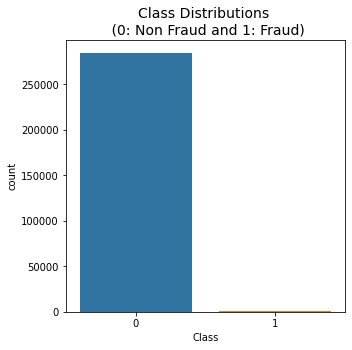

In [ ]:
#determine number of fraud cases in dataset (plotting distribution of class)
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]
print('Fraud Count :',len(fraud))
print('Non Fraud Count :',len(non_fraud))
print('Fraud Data : ',round(len(fraud)/len(df['Class'])*100,2),'% of dataset')
print('Non Fraud Data : ',round(len(non_fraud)/len(df['Class'])*100,2),'% of dataset')
plt.figure(figsize=(5,5))
plt.title('Class Distributions \n (0: Non Fraud and 1: Fraud)', fontsize=14)
figure = sns.countplot(x="Class", data=df)
plt.show()



In [ ]:
#Description of dataset.
df.describe()

,Class,Amount,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,284807.000000,284807.000000,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,0.001727,88.349619,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16
std,0.041527,250.120109,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01
min,0.000000,0.000000,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01
25%,0.000000,5.600000,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02
50%,0.000000,22.000000,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02
75%,0.000000,77.165000,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02
max,1.000000,25691.160000,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01


In [ ]:
#Description of Fraudulant Transaction.
fraud.describe()

,Class,Amount,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,492.0,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000
mean,1.0,122.211321,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667
std,0.0,256.683288,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,4.897341,2.678605,4.654458,1.104518,4.278940,1.049915,3.865035,6.970618,2.899366,1.539853,1.346635,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291
min,1.0,0.000000,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,-24.588262,-1.702228,-18.683715,-3.127795,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-3.681904,-4.128186,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290
25%,1.0,1.000000,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,-7.756698,1.973397,-8.688177,-0.979117,-9.692723,-0.643539,-6.562915,-11.945057,-4.664576,-0.299423,-0.171760,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868
50%,1.0,9.250000,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,-4.578825,3.586218,-5.502530,-0.065566,-6.729720,-0.057227,-3.549795,-5.302949,-1.664346,0.646807,0.284693,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344
75%,1.0,105.890000,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,-2.614184,5.307078,-2.974088,0.672964,-4.282821,0.609189,-1.226043,-1.341940,0.091772,1.649318,0.822445,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152
max,1.0,2125.870000,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,4.031435,12.018913,1.375941,2.815440,3.442422,2.471358,3.139656,6.739384,3.790316,5.228342,11.059004,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364


In [ ]:
#Description of Fraudulant Transaction.
non_fraud.describe()

,Class,Amount,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,284315.0,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000
mean,0.0,88.291022,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131
std,0.0,250.105092,47484.015786,1.929814,1.636146,1.459429,1.399333,1.356952,1.329913,1.178812,1.161283,1.089372,1.044204,1.003112,0.945939,0.995067,0.897007,0.915060,0.844772,0.749457,0.824919,0.811733,0.769404,0.716743,0.723668,0.621541,0.605776,0.520673,0.482241,0.399847,0.329570
min,0.0,0.000000,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,-14.741096,-4.797473,-15.144988,-5.791881,-18.392091,-4.391307,-10.115560,-17.098444,-5.366660,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084
25%,0.0,5.650000,54230.000000,-0.917544,-0.599473,-0.884541,-0.850077,-0.689398,-0.766847,-0.551442,-0.208633,-0.640412,-0.532880,-0.763447,-0.402102,-0.648067,-0.422453,-0.582812,-0.465543,-0.482644,-0.497414,-0.456366,-0.211764,-0.228509,-0.542403,-0.161702,-0.354425,-0.317145,-0.327074,-0.070852,-0.052950
50%,0.0,22.000000,84711.000000,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,-0.049964,-0.091872,-0.034923,0.141679,-0.013547,0.051947,0.048294,0.067377,-0.064833,-0.002787,0.003117,-0.062646,-0.029821,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199
75%,0.0,77.050000,139333.000000,1.316218,0.800446,1.028372,0.737624,0.612181,0.399619,0.571019,0.326200,0.598230,0.455135,0.736362,0.619207,0.662492,0.494104,0.648842,0.523738,0.399922,0.501103,0.457499,0.132401,0.185626,0.528407,0.147522,0.439869,0.350594,0.240671,0.090573,0.077962
max,0.0,25691.160000,172792.000000,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,23.745136,10.002190,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808


In [ ]:
# Checking any missing values in data
df.isna().sum()

Class     0
Amount    0
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
dtype: int64

In [ ]:
# to shows no of columns and what are those columns
df.columns

Index(['Class', 'Amount', 'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7',
       'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17',
       'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28'],
      dtype='object')

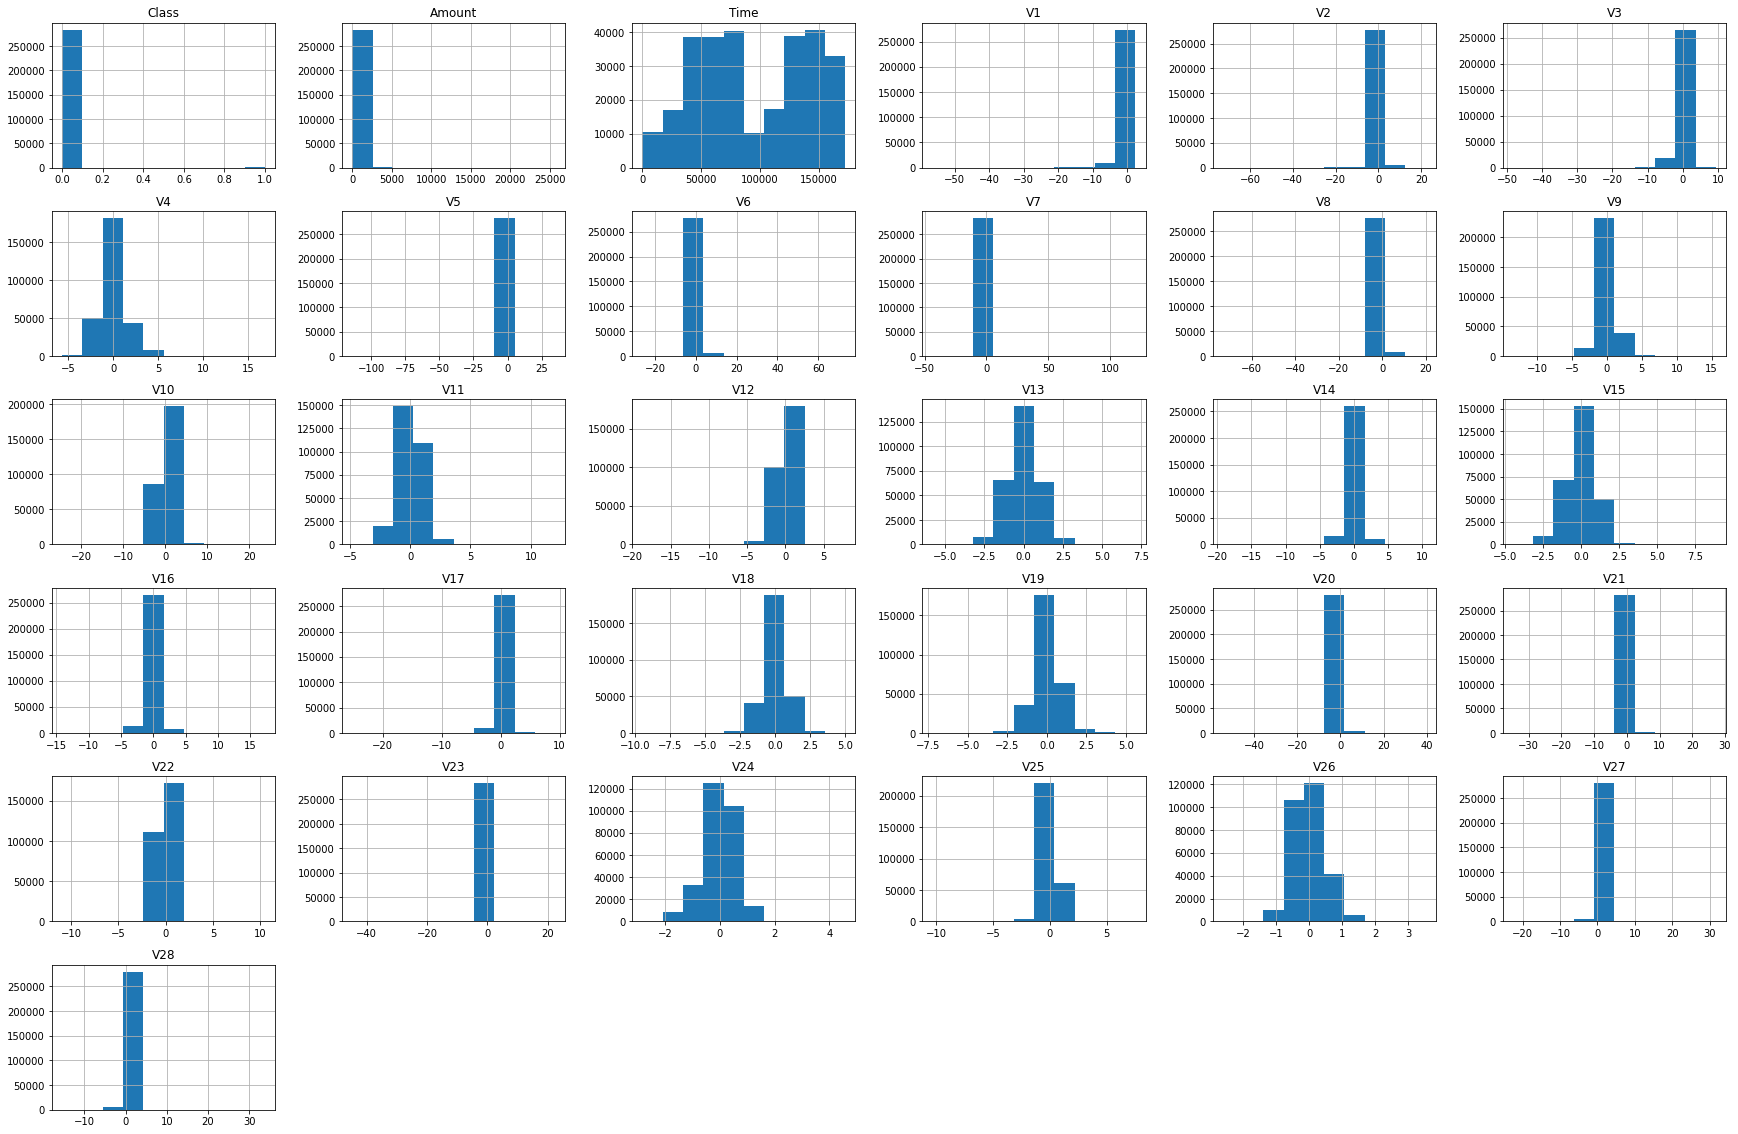

In [ ]:
# plot Histogram of each parameter
df.hist(figsize=(30,20))
plt.show()

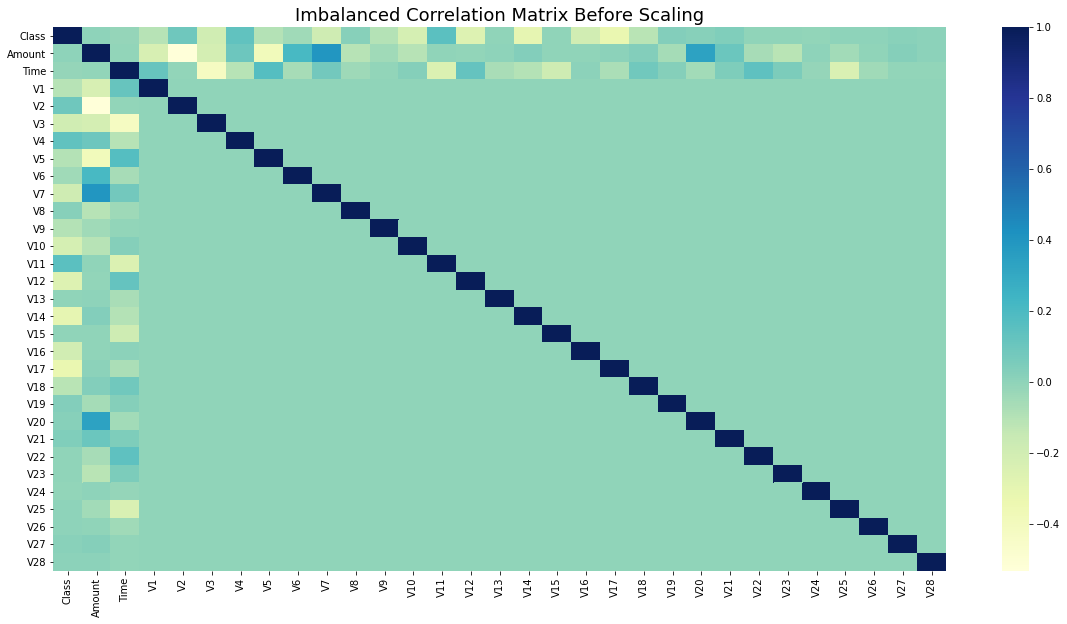

In [ ]:
# Sample figsize in inches
fig,ax = plt.subplots(figsize=(20,10))         
# Imbalanced DataFrame Correlation
corr = df.corr()
sns.heatmap(corr, cmap='YlGnBu', ax=ax)
ax.set_title("Imbalanced Correlation Matrix Before Scaling", fontsize=18)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


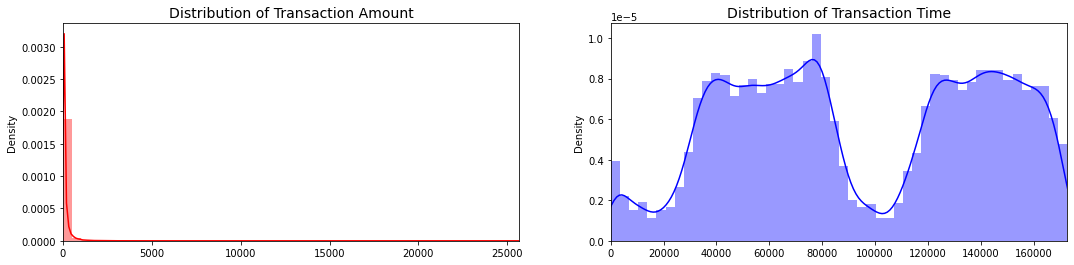

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

In [ ]:
# scaling the unscaled Time and amount column
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


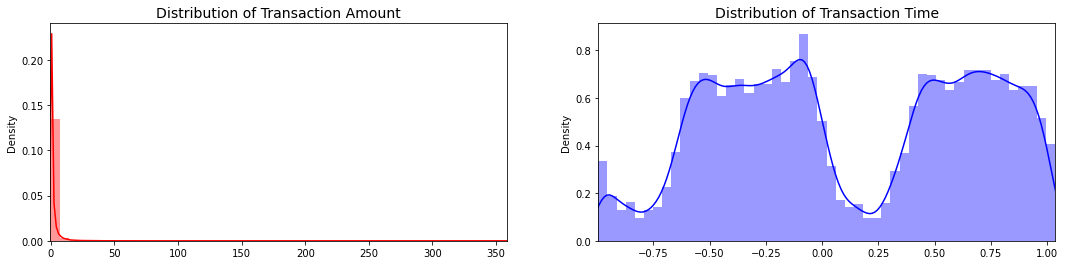

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['scaled_amount'].values
time_val = df['scaled_time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

In [ ]:
scaled_time = df['scaled_time']
df.drop(['scaled_time'], axis=1, inplace=True)
df.insert(1,'scaled_time',scaled_time)

scaled_amount = df['scaled_amount']
df.drop(['scaled_amount'], axis=1, inplace=True)
df.insert(1,'scaled_amount',scaled_amount)

In [ ]:
# Dataset describtion after scaling of time and amount
df.describe()

,Class,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,284807.000000,284807.000000,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,0.001727,0.927124,0.118914,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16
std,0.041527,3.495006,0.557903,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01
min,0.000000,-0.307413,-0.994983,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01
25%,0.000000,-0.229162,-0.358210,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02
50%,0.000000,0.000000,0.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02
75%,0.000000,0.770838,0.641790,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02
max,1.000000,358.683155,1.035022,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01


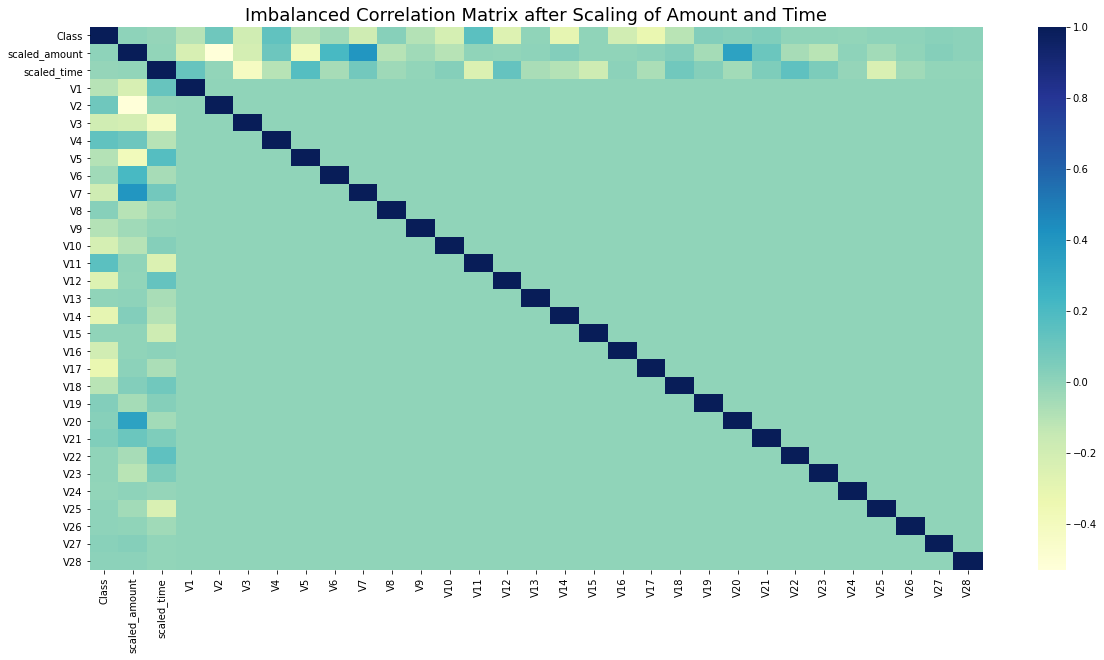

In [ ]:
# Figure out correlations, plot correlation matrix:
# Sample figsize in inches
fig,ax = plt.subplots(figsize=(20,10))         
# Imbalanced DataFrame Correlation
corr = df.corr()
sns.heatmap(corr, cmap='YlGnBu', ax=ax)
ax.set_title("Imbalanced Correlation Matrix after Scaling of Amount and Time", fontsize=18)
plt.show()

In [ ]:
# Undersampling The Class Feature

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]

#Randomly select 492 observations from non fraud transaction 
non_fraud_df = df.loc[df['Class'] == 0].sample(n=492,random_state=42)
undersampled_normalized_df = pd.concat([fraud_df, non_fraud_df])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


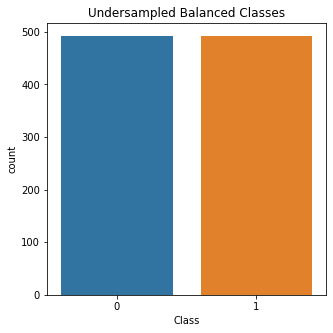

In [ ]:
plt.figure(figsize=(5, 5))
sns.countplot('Class', data=undersampled_normalized_df)
plt.title('Undersampled Balanced Classes')
plt.show()

In [ ]:
# Oversampling The Class Feature
from imblearn.over_sampling import SMOTE
# SMOTE is used to oversample minority datasample which looks like exactly minority class
sm = SMOTE(random_state=7)

oversampled_trainX, oversampled_trainY = sm.fit_sample(df.drop('Class', axis=1), df['Class'])
oversampled_train_df = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis=1)
oversampled_train_df.columns = undersampled_normalized_df.columns

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


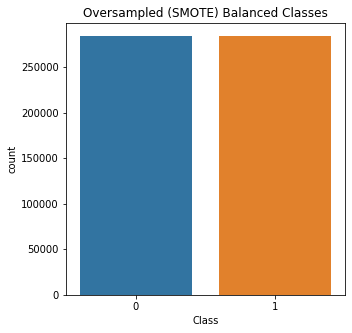

In [ ]:
plt.figure(figsize=(5, 5))
sns.countplot('Class', data=oversampled_train_df)
plt.title('Oversampled (SMOTE) Balanced Classes')
plt.show()

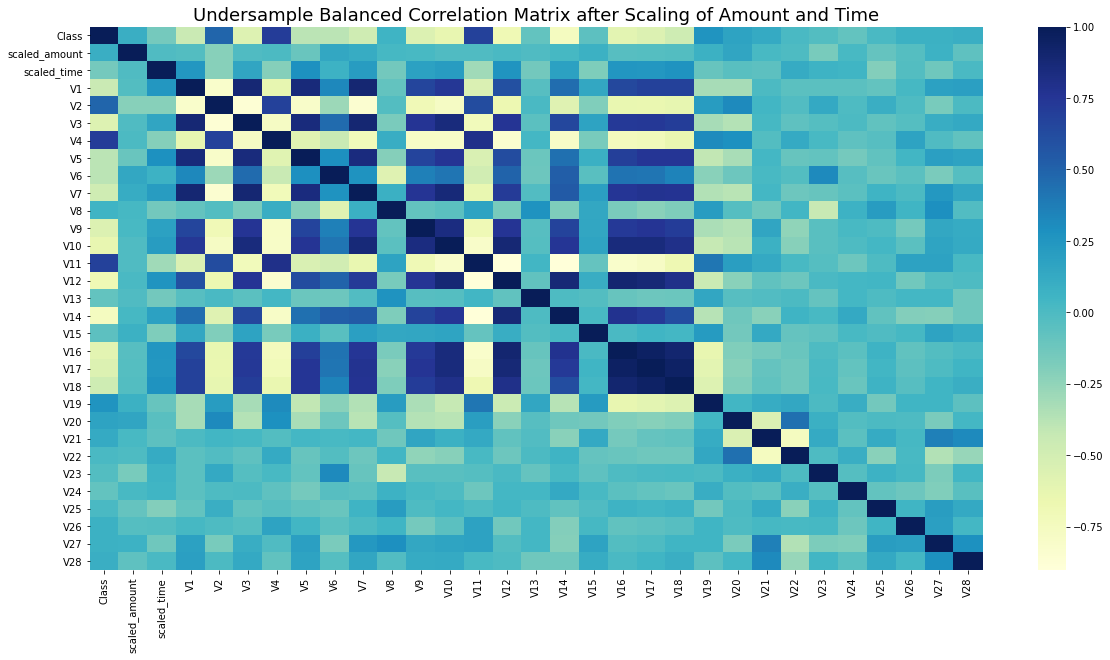

In [ ]:
# Figure out correlations, plot correlation matrix:
# Sample figsize in inches
fig,ax = plt.subplots(figsize=(20,10))         
# Imbalanced DataFrame Correlation
corr = undersampled_normalized_df.corr()
sns.heatmap(corr, cmap='YlGnBu', ax=ax)
ax.set_title("Undersample Balanced Correlation Matrix after Scaling of Amount and Time", fontsize=18)
plt.show()

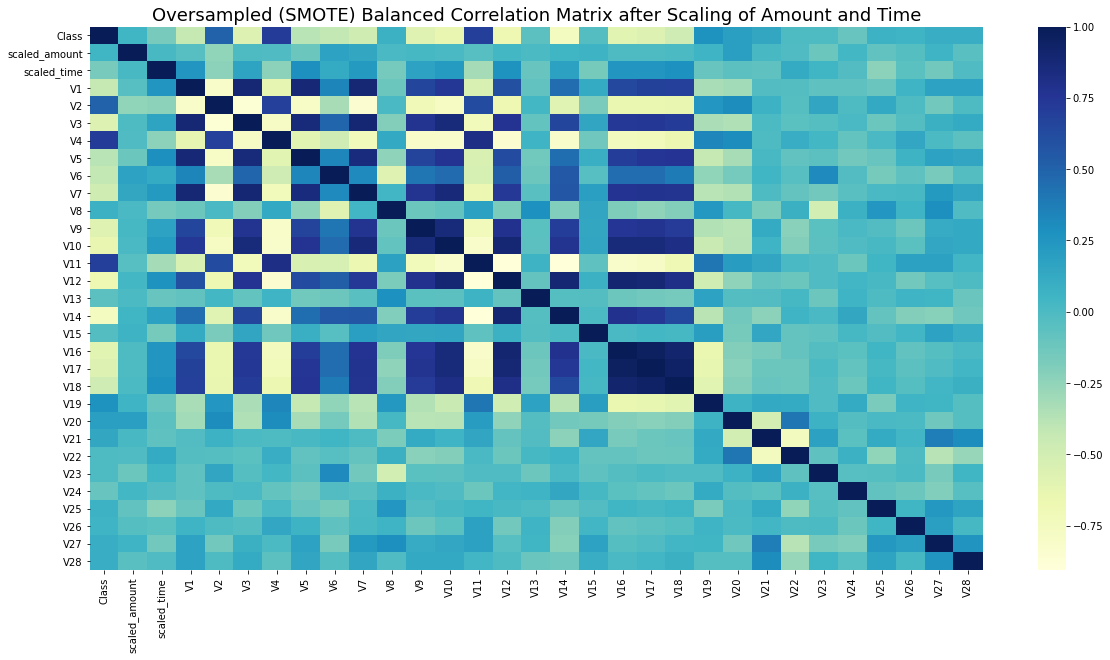

In [ ]:
# Figure out correlations, plot correlation matrix:
# Sample figsize in inches
fig,ax = plt.subplots(figsize=(20,10))         
# Imbalanced DataFrame Correlation
corr = oversampled_train_df.corr()
sns.heatmap(corr, cmap='YlGnBu', ax=ax)
ax.set_title("Oversampled (SMOTE) Balanced Correlation Matrix after Scaling of Amount and Time", fontsize=18)
plt.show()

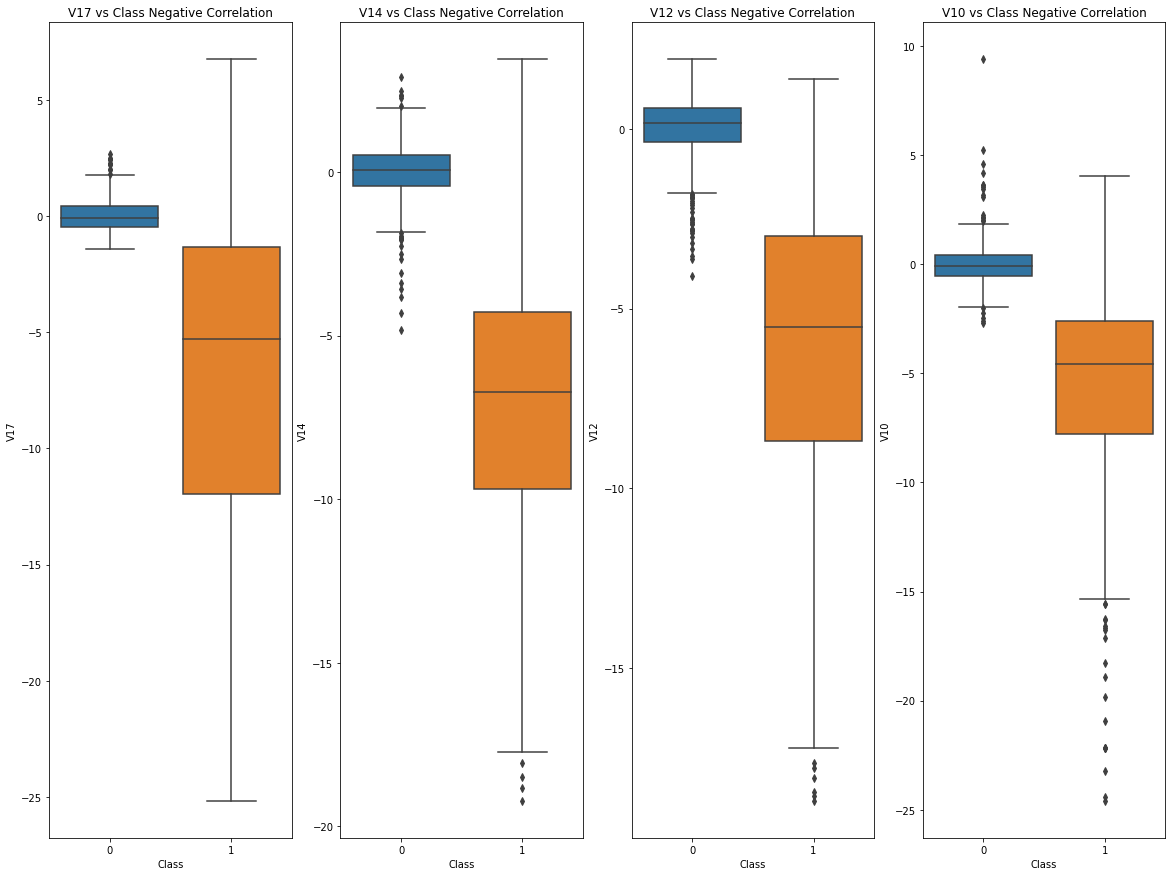

In [ ]:
# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)

fig, axes = plt.subplots(ncols=4, figsize=(20,15))

sns.boxplot(x="Class", y="V17", data=undersampled_normalized_df, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V14", data=undersampled_normalized_df, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=undersampled_normalized_df, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V10", data=undersampled_normalized_df, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

#Anomaly Detection:


To remove "extreme outliers" from features that have a high correlation with our classes. This will have a positive impact on the accuracy of our models.



##What are the criteria to identify an outlier?
1. Data point that falls outside of 1.5 times of an interquartile range above the 3rd quartile and below the 1st quartile
2. Data point that falls outside of 3 standard deviations. we can use a z score and if the z score falls outside of 2 standard deviation

##What is the reason for an outlier to exists in a dataset?
1. Variability in the data
2. An experimental measurement error

##What are the impacts of having outliers in a dataset?
1. It causes various problems during our statistical analysis
2. It may cause a significant impact on the mean and the standard deviation

##Various ways of finding the outlier.
1. Using scatter plots
2. Box plot
3. using z score
4. using the IQR interquantile range

##Detecting outlier using Z score¶
Using Z score

Formula for Z score = (Observation — Mean)/Standard Deviation

z = (X — μ) / σ

##InterQuantile Range (IQR):
Here we calculate this by taking the difference between the 75th percentile and 25th percentile. 
Our aim is to create a threshold beyond the 75th and 25th percentile. Then pass this threshold that instance will be deleted.

75% - 25% values in a dataset

Steps
1. Arrange the data in increasing order
2. Calculate first(q1) and third quartile(q3)
3. Find interquartile range (q3-q1)
4. Find lower bound q1*1.5
5. Find upper bound q3*1.5

Anything that lies outside of lower and upper bound is an outlier


###Boxplots: 
Besides easily seeing the 25th and 75th percentiles (both end of the squares) it is also easy to see extreme outliers (points beyond the lower and higher extreme).
##Outlier Removal Tradeoff:
We have to be careful as to how far do we want the threshold for removing outliers. We determine the threshold by multiplying a number (ex: 1.5) by the (Interquartile Range). The higher this threshold is, the less outliers will detect (multiplying by a higher number ex: 3), and the lower this threshold is the more outliers it will detect.


##The Tradeoff: 
The lower the threshold the more outliers it will remove however, we want to focus more on "extreme outliers" rather than just outliers. 
Why? because we might run the risk of information loss which will cause our models to have a lower accuracy. You can play with this threshold and see how it affects the accuracy of our classification models.

##Summary:
###Visualize Distributions: 
We first start by visualizing the distribution of the feature we are going to use to eliminate some of the outliers. V14 is the only feature that has a Gaussian distribution compared to features V12 and V10.
###Determining the threshold: 
After we decide which number we will use to multiply with the iqr (the lower more outliers removed), we will proceed in determining the upper and lower thresholds by substrating q25 - threshold (lower extreme threshold) and adding q75 + threshold (upper extreme threshold).
###Conditional Dropping: 
Lastly, we create a conditional dropping stating that if the "threshold" is exceeded in both extremes, the instances will be removed.
###Boxplot Representation: 
Visualize through the boxplot that the number of "extreme outliers" have been reduced to a considerable amount.
Note: After implementing outlier reduction our accuracy has been improved by over 3%! Some outliers can distort the accuracy of our models but remember, we have to avoid an extreme amount of information loss or else our model runs the risk of underfitting.

###Reference: 
More information on Interquartile Range Method: How to Use Statistics to Identify Outliers in Data by Jason Brownless (Machine Learning Mastery blog)


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

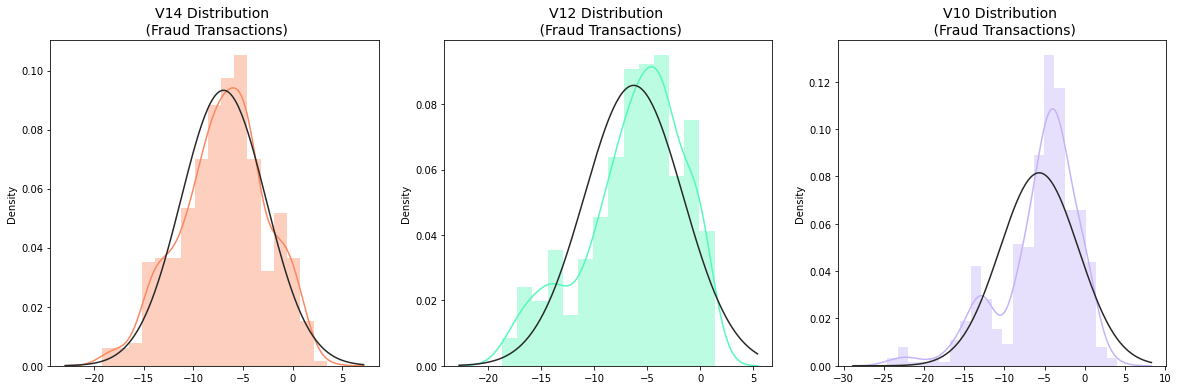

In [ ]:
# Visualize Distributions:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = undersampled_normalized_df['V14'].loc[undersampled_normalized_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = undersampled_normalized_df['V12'].loc[undersampled_normalized_df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = undersampled_normalized_df['V10'].loc[undersampled_normalized_df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

In [ ]:
# # -----> V14 Removing Outliers (Highest Negative Correlated with Labels)
print('V14 Outlier Detection')
v14_fraud = undersampled_normalized_df['V14'].loc[undersampled_normalized_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V14 outliers:{}'.format(outliers))
#
#new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
print('----' * 44)


# -----> V12 removing outliers from fraud transactions
print('V12 Outlier Detection')
v12_fraud = undersampled_normalized_df['V12'].loc[undersampled_normalized_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
#new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
#print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('----' * 44)


# Removing outliers V10 Feature
print('V10 Outlier Detection')
v10_fraud = undersampled_normalized_df['V10'].loc[undersampled_normalized_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
#new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
#print('Number of Instances after outliers removal: {}'.format(len(new_df)))


V14 Outlier Detection
Quartile 25: -9.692722964972385 | Quartile 75: -4.282820849486866
iqr: 5.409902115485519
Cut Off: 8.114853173228278
V14 Lower: -17.807576138200663
V14 Upper: 3.8320323237414122
Feature V14 Outliers for Fraud Cases: 4
V14 outliers:[-19.2143254902614, -18.8220867423816, -18.4937733551053, -18.049997689859396]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Outlier Detection
V12 Lower: -17.25930926645337
V12 Upper: 5.597044719256134
V12 outliers: [-17.7691434633638, -17.631606313870698, -18.047596570821604, -18.683714633344298, -18.553697009645802, -18.4311310279993]
Feature V12 Outliers for Fraud Cases: 6
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V10 Outlier Detection
V10 Lower: -15.47046969983434
V10 U

#Detecting outlier using Z score
Using Z score
Formula for Z score = (Observation — Mean)/Standard Deviation

z = (X — μ) / σ



NameError: ignored

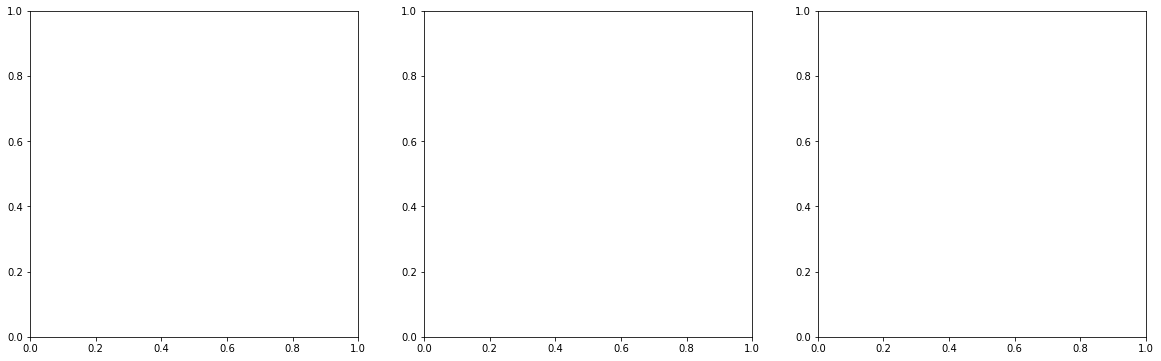

In [ ]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']
# Boxplots with outliers removed
# Feature V14
sns.boxplot(x="Class", y="V14", data=new_df,ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature 12
sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2, palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature V10
sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3, palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)


plt.show()

In [ ]:
# Remove Outliers and re-plot the Boxplot
V14_non_fraud = undersampled_normalized_df.query('V14 > -4 & Class == 0')
V14_fraud = undersampled_normalized_df.query('Class == 1')
undersampled_normalized_df_no_outlier = pd.concat([V14_non_fraud,V14_fraud])


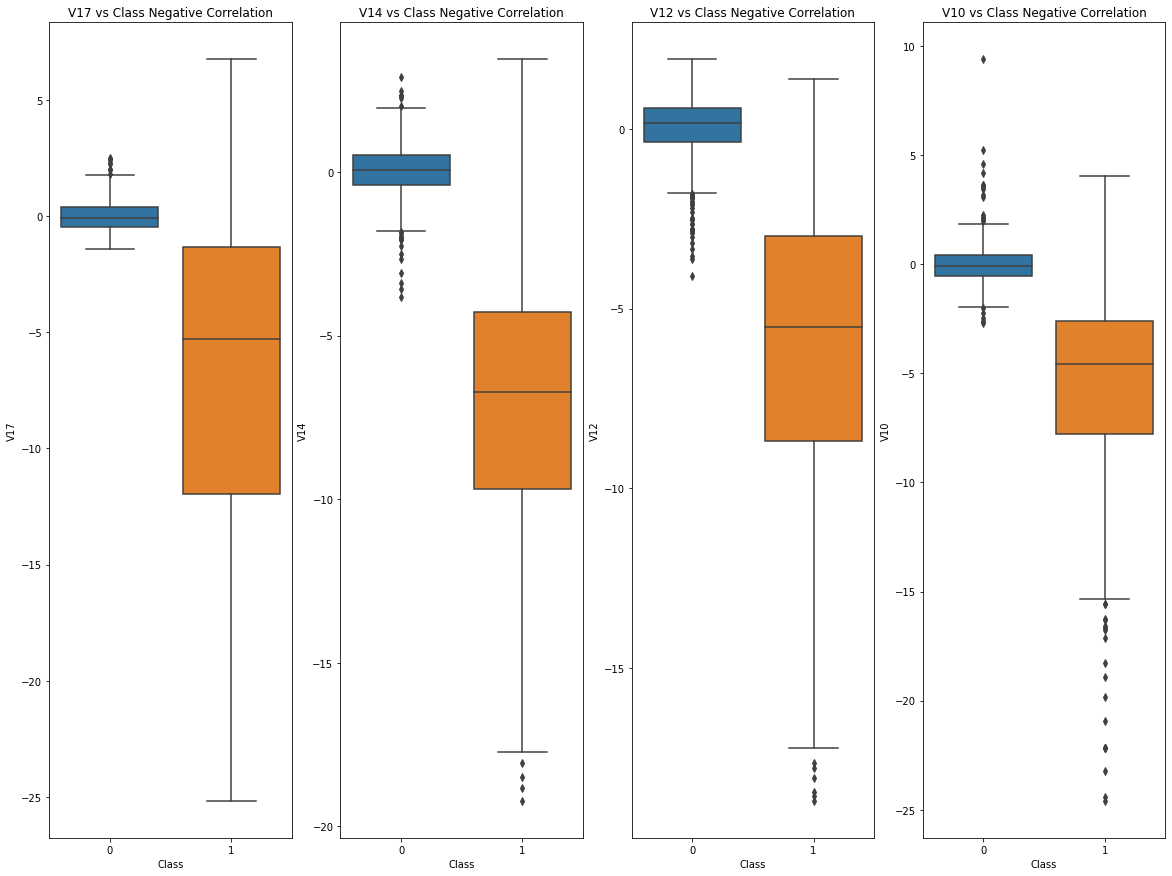

In [ ]:
fig, axes = plt.subplots(ncols=4, figsize=(20,15))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=undersampled_normalized_df_no_outlier, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=undersampled_normalized_df_no_outlier, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=undersampled_normalized_df_no_outlier, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V10", data=undersampled_normalized_df, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

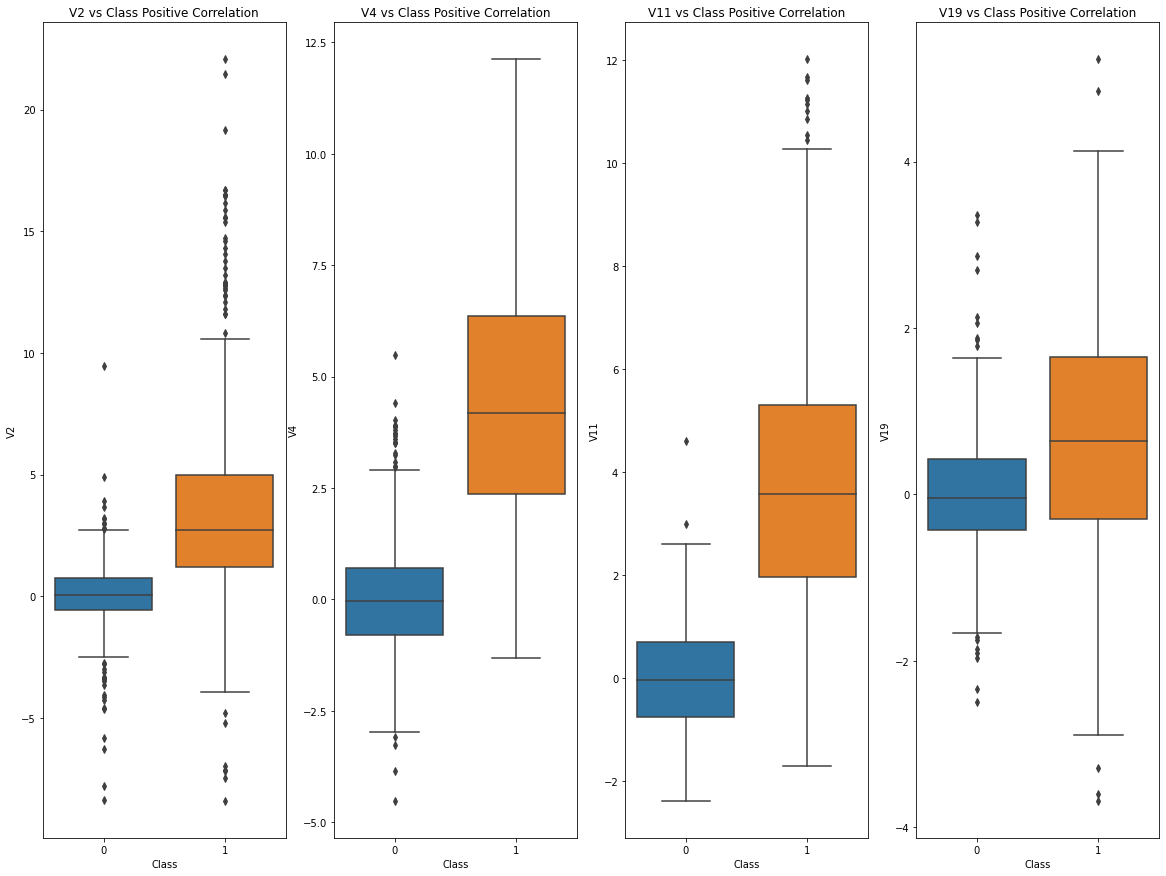

In [ ]:
f, axes = plt.subplots(ncols=4, figsize=(20,15))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)

sns.boxplot(x="Class", y="V2", data=undersampled_normalized_df, ax=axes[0])
axes[0].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V4", data=undersampled_normalized_df, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V11", data=undersampled_normalized_df, ax=axes[2])
axes[2].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V19", data=undersampled_normalized_df, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

In [ ]:
# Remove Outliers and re-plot the Boxplot
V2_non_fraud = undersampled_normalized_df.query('V2 < 8 & Class == 0')
V2_fraud = undersampled_normalized_df.query('Class == 1')
undersampled_normalized_df_no_outlier2 = pd.concat([V2_non_fraud,V2_fraud])


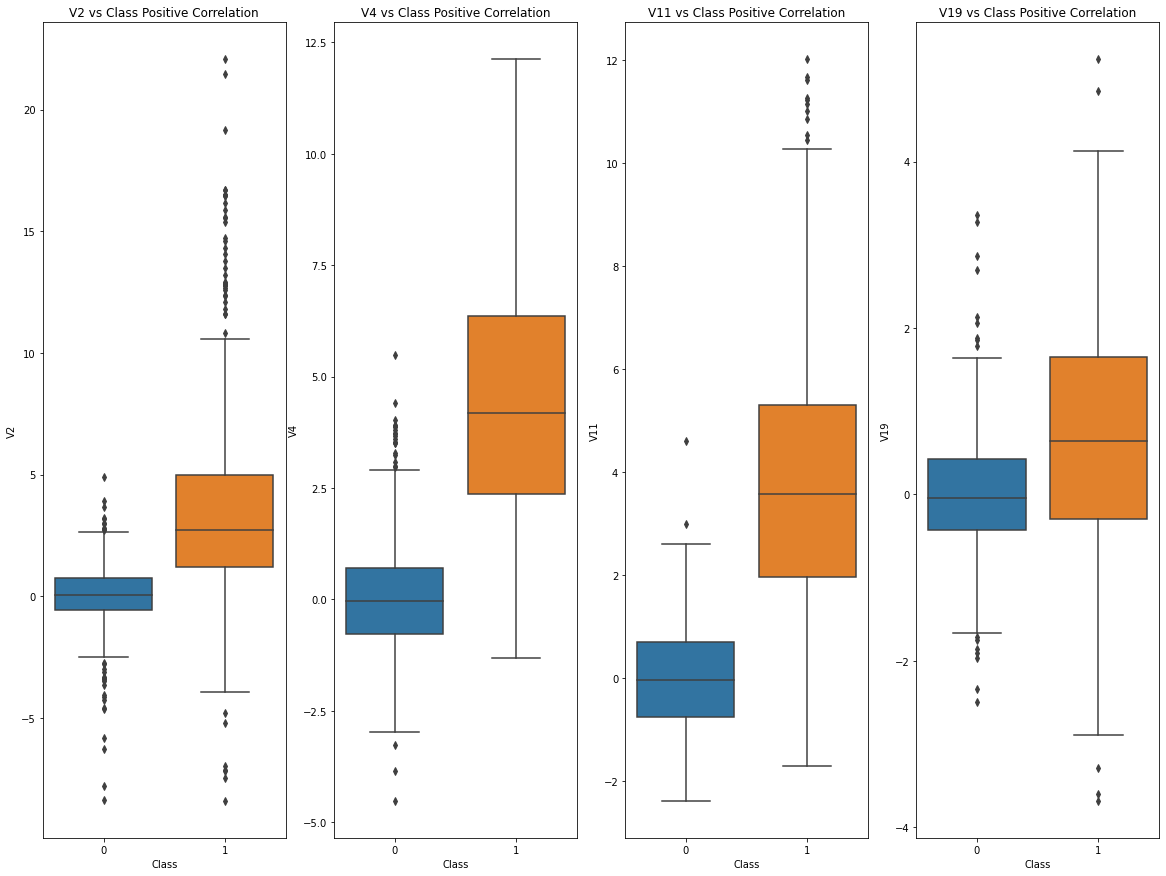

In [ ]:
f, axes = plt.subplots(ncols=4, figsize=(20,15))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)

sns.boxplot(x="Class", y="V2", data=undersampled_normalized_df_no_outlier2, ax=axes[0])
axes[0].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V4", data=undersampled_normalized_df_no_outlier2, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V11", data=undersampled_normalized_df_no_outlier2, ax=axes[2])
axes[2].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V19", data=undersampled_normalized_df_no_outlier2, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

In [ ]:
undersampled_normalized_df_no_outlier = undersampled_normalized_df_no_outlier2

In [ ]:
# Working on Undersampled dataset after outlier removal
X = undersampled_normalized_df_no_outlier.drop('Class', axis=1)
y = undersampled_normalized_df_no_outlier['Class']

In [ ]:
# Working on Undersampled dataset
X = undersampled_normalized_df.drop('Class', axis=1)
y = undersampled_normalized_df['Class']

In [ ]:
X_train_un, X_test_un, y_train_un, y_test_un = train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
# Crate array for Traing and testting values for dataset
X_train_un = X_train_un.values 
X_test_un = X_test_un.values 
y_train_un = y_train_un.values 
y_test_un = y_test_un.values

In [ ]:
# Create dictionary of different classifier
classifiers = {
    "LogisticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [ ]:
# check Training score and accuracy score
from sklearn.model_selection import cross_val_score
for key, classifier in classifiers.items():
    classifier.fit(X_train_un, y_train_un)
    training_score_un = cross_val_score(classifier, X_train_un, y_train_un, cv=5)
    print("Classifiers:",classifier.__class__.__name__,"has a training score of", round(training_score_un.mean(),2)*100,"% accuracy")

Classifiers: LogisticRegression has a training score of 93.0 % accuracy
Classifiers: KNeighborsClassifier has a training score of 93.0 % accuracy
Classifiers: SVC has a training score of 93.0 % accuracy
Classifiers: DecisionTreeClassifier has a training score of 89.0 % accuracy


In [ ]:
log_reg=LogisticRegression()
knears = KNeighborsClassifier()
svc=SVC()
tree_clf=DecisionTreeClassifier()
log_reg_score_un = cross_val_score(log_reg,X_train_un,y_train_un,cv=5)
print('Logistic Regression Cross Validation Score:', round(log_reg_score_un.mean()*100,2).astype(str)+'%')

knears_score_un = cross_val_score(knears,X_train_un,y_train_un,cv=5)
print('KNeighbors Cross Validation Score:', round(knears_score_un.mean()*100,2).astype(str)+'%')

svc_score_un = cross_val_score(svc,X_train_un,y_train_un,cv=5)
print('Support Vector Classifier Cross Validation Score:', round(svc_score_un.mean()*100,2).astype(str)+'%')

tree_score_un = cross_val_score(tree_clf,X_train_un,y_train_un,cv=5)
print('Decision Tree Classifier Cross Validation Score:', round(tree_score_un.mean()*100,2).astype(str)+'%')


Logistic Regression Cross Validation Score: 93.26%
KNeighbors Cross Validation Score: 93.14%
Support Vector Classifier Cross Validation Score: 92.88%
Decision Tree Classifier Cross Validation Score: 89.33%


In [ ]:
# Using Cross validation score for predicting target variable and genearet ROC, AUC score
# ROC is probability curve
# AUC is represent degree of measure of separability. It tell how much model distingusing between two classes.
# If AUC is higher then model is better to predicting 0 as 0 and 1 as 1

from sklearn.metrics import roc_curve, classification_report
from sklearn.model_selection import cross_val_predict

log_reg_pred_un = cross_val_predict(log_reg, X_train_un, y_train_un, cv=5, method="decision_function")

knears_pred_un = cross_val_predict(knears, X_train_un, y_train_un, cv=5)

svc_pred_un = cross_val_predict(svc,X_train_un, y_train_un, cv=5, method="decision_function")

tree_pred_un = cross_val_predict(tree_clf, X_train_un, y_train_un, cv=5)



In [ ]:
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot = export_graphviz(tree_pred_un, filled=True, rounded=True,
                      feature_names=undersampled_normalized_df.columns, class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot)  
Image(graph.create_png())

TypeError: ignored

In [ ]:
from sklearn.metrics import roc_auc_score
print('Logistic Regression with Cross Validation:', roc_auc_score(y_train_un,log_reg_pred_un))
print('KNears Neighbors with Cross Validation:', roc_auc_score(y_train_un,knears_pred_un))
print('Support Vector Classifier with Cross Validation:', roc_auc_score(y_train_un,svc_pred_un))
print('Decision Tree Classifier with Cross Validation:', roc_auc_score(y_train_un,tree_pred_un))

Logistic Regression with Cross Validation: 0.9699306389739218
KNears Neighbors with Cross Validation: 0.9313235427080508
Support Vector Classifier with Cross Validation: 0.9764211260510715
Decision Tree Classifier with Cross Validation: 0.8907305511424549


In [ ]:
print('KNeighbors \n',classification_report(y_train_un,knears_pred_un))
#print(classification_report(y_train_un,svc_pred_un))
print('Decision Tree \n',classification_report(y_train_un,tree_pred_un))

KNeighbors 
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       394
           1       0.98      0.88      0.93       393

    accuracy                           0.93       787
   macro avg       0.94      0.93      0.93       787
weighted avg       0.94      0.93      0.93       787

Decision Tree 
               precision    recall  f1-score   support

           0       0.89      0.89      0.89       394
           1       0.89      0.90      0.89       393

    accuracy                           0.89       787
   macro avg       0.89      0.89      0.89       787
weighted avg       0.89      0.89      0.89       787



In [ ]:
# Training without Cross Validation
log_reg.fit(X_train_un, y_train_un)
knears.fit(X_train_un, y_train_un)
svc.fit(X_train_un, y_train_un)
tree_clf.fit(X_train_un, y_train_un)

In [ ]:
# Predict Model
reg_y_pred_un=log_reg.predict(X_test_un)
reg_accuracy_un=log_reg.score(X_test_un, y_test_un)
knears_y_pred_un=knears.predict(X_test_un)
knears_accuracy_un=knears.score(X_test_un, y_test_un)
svc_y_pred_un=knears.predict(X_test_un)
svc_accuracy_un=knears.score(X_test_un, y_test_un)
tree_y_pred_un=knears.predict(X_test_un)
tree_accuracy_un=knears.score(X_test_un, y_test_un)

In [ ]:

from sklearn.metrics import confusion_matrix
reg_cm = confusion_matrix(y_test_un,reg_y_pred_un)
knears_cm = confusion_matrix(y_test_un,knears_y_pred_un)
svc_cm = confusion_matrix(y_test_un,svc_y_pred_un)
tree_cm = confusion_matrix(y_test_un,tree_y_pred_un)
print(reg_cm)
print(knears_cm)
print(svc_cm)
print(tree_cm)

In [ ]:
print('Accuracy Score of Logistic Regression Model (without CV)',reg_accuracy_un*100,'%')
print('Accuracy Score of KNears Neighbors Model (without CV)',knears_accuracy_un*100,'%')
print('Accuracy Score of Support Vector Classifiers (without CV)',svc_accuracy_un*100,'%')
print('Accuracy Score of Decision Tree Classifiers (without CV)',tree_accuracy_un*100,'%')

In [ ]:
print(" Comfusion Matrix Linear Regression")
Accuracy_Reg = ((reg_cm[0][0]+reg_cm[1][1])/reg_cm.sum())*100
print("Accuracy Decision:", Accuracy_Reg)
Error_rate_Reg = ((reg_cm[0][1]+reg_cm[1][0])/reg_cm.sum())*100
print("Error Rate Decision",Error_rate_Reg)
#True Fake Rate
Specificity_Reg = (reg_cm[1][1]/(reg_cm[1][1]+reg_cm[0][1]))*100
print("Specificity Decision:", Specificity_Reg)
# True Genuine Rate
Sensitivity_Reg = (reg_cm[0][0]/(reg_cm[0][0]+reg_cm[1][0]))*100
print("Sensitivity Decision",Sensitivity_Reg)

In [ ]:
from sklearn. metrics import 

In [ ]:
# Working on Oversampled dataset
X = oversampled_train_df.drop('Class', axis=1)
y = oversampled_train_df['Class']

In [ ]:
X_train_un, X_test_un, y_train_un, y_test_un = train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
# Crate array for Traing and testting values for dataset
X_train_un = X_train_un.values 
X_test_un = X_test_un.values 
y_train_un = y_train_un.values 
y_test_un = y_test_un.values

In [ ]:
# Create dictionary of different classifier
classifiers = {
    "LogisticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [ ]:
# check Training score and accuracy score
from sklearn.model_selection import cross_val_score
for key, classifier in classifiers.items():
    classifier.fit(X_train_un, y_train_un)
    training_score_un = cross_val_score(classifier, X_train_un, y_train_un, cv=5)
    print("Classifiers:",classifier.__class__.__name__,"has a training score of", round(training_score_un.mean(),2)*100,"% accuracy")

In [ ]:
from sklearn.model_selection import cross_val_score
log_reg=LogisticRegression()
knears = KNeighborsClassifier()
svc=SVC()
tree_clf=DecisionTreeClassifier()
log_reg_score_un = cross_val_score(log_reg,X_train_un,y_train_un,cv=5)
print('Logistic Regression Cross Validation Score:', round(log_reg_score_un.mean()*100,2).astype(str)+'%')

knears_score_un = cross_val_score(knears,X_train_un,y_train_un,cv=5)
print('KNeighbors Cross Validation Score:', round(knears_score_un.mean()*100,2).astype(str)+'%')

svc_score_un = cross_val_score(svc,X_train_un,y_train_un,cv=5)
print('Support Vector Classifier Cross Validation Score:', round(svc_score_un.mean()*100,2).astype(str)+'%')

tree_score_un = cross_val_score(tree_clf,X_train_un,y_train_un,cv=5)
print('Decision Tree Classifier Cross Validation Score:', round(tree_score_un.mean()*100,2).astype(str)+'%')

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Logistic Regression Cross Validation Score: 94.87%
KNeighbors Cross Validation Score: 99.87%
Support Vector Classifier Cross Validation Score: 97.58%
Decision Tree Classifier Cross Validation Score: 99.78%


In [ ]:
# Using Cross validation score for predicting target variable and genearet ROC, AUC score
# ROC is probability curve
# AUC is represent degree of measure of separability. It tell how much model distingusing between two classes.
# If AUC is higher then model is better to predicting 0 as 0 and 1 as 1

from sklearn.metrics import roc_curve, classification_report
from sklearn.model_selection import cross_val_predict

log_reg_pred_un = cross_val_predict(log_reg, X_train_un, y_train_un, cv=5, method="decision_function")

knears_pred_un = cross_val_predict(knears, X_train_un, y_train_un, cv=5)

svc_pred_un = cross_val_predict(svc,X_train_un, y_train_un, cv=5, method="decision_function")

tree_pred_un = cross_val_predict(tree_clf, X_train_un, y_train_un, cv=5)


NameError: ignored

In [ ]:
from sklearn.metrics import roc_auc_score
print('Logistic Regression with Cross Validation:', roc_auc_score(y_train_un,log_reg_pred_un))
print('KNears Neighbors with Cross Validation:', roc_auc_score(y_train_un,knears_pred_un))
print('Support Vector Classifier with Cross Validation:', roc_auc_score(y_train_un,svc_pred_un))
print('Decision Tree Classifier with Cross Validation:', roc_auc_score(y_train_un,tree_pred_un))

In [ ]:
print('KNeighbors \n',classification_report(y_train_un,knears_pred_un))
#print(classification_report(y_train_un,svc_pred_un))
print('Decision Tree \n',classification_report(y_train_un,tree_pred_un))

In [ ]:
# Training without Cross Validation
log_reg.fit(X_train_un, y_train_un)
knears.fit(X_train_un, y_train_un)
svc.fit(X_train_un, y_train_un)
tree_clf.fit(X_train_un, y_train_un)

In [ ]:
# Predict Model
reg_y_pred_un=log_reg.predict(X_test_un)
reg_accuracy_un=log_reg.score(X_test_un, y_test_un)
knears_y_pred_un=knears.predict(X_test_un)
knears_accuracy_un=knears.score(X_test_un, y_test_un)
svc_y_pred_un=knears.predict(X_test_un)
svc_accuracy_un=knears.score(X_test_un, y_test_un)
tree_y_pred_un=knears.predict(X_test_un)
tree_accuracy_un=knears.score(X_test_un, y_test_un)

In [ ]:
from sklearn.metrics import confusion_matrix
reg_cm = confusion_matrix(y_test_un,reg_y_pred_un)
knears_cm = confusion_matrix(y_test_un,knears_y_pred_un)
svc_cm = confusion_matrix(y_test_un,svc_y_pred_un)
tree_cm = confusion_matrix(y_test_un,tree_y_pred_un)
print(reg_cm)
print(knears_cm)
print(svc_cm)
print(tree_cm)

In [ ]:
print('Accuracy Score of Logistic Regression Model (without CV)',reg_accuracy_un*100,'%')
print('Accuracy Score of KNears Neighbors Model (without CV)',knears_accuracy_un*100,'%')
print('Accuracy Score of Support Vector Classifiers (without CV)',svc_accuracy_un*100,'%')
print('Accuracy Score of Decision Tree Classifiers (without CV)',tree_accuracy_un*100,'%')

In [ ]:
print(" Comfusion Matrix Linear Regression")
Accuracy_Reg = ((reg_cm[0][0]+reg_cm[1][1])/reg_cm.sum())*100
print("Accuracy Decision:", Accuracy_Reg)
Error_rate_Reg = ((reg_cm[0][1]+reg_cm[1][0])/reg_cm.sum())*100
print("Error Rate Decision",Error_rate_Reg)
#True Fake Rate
Specificity_Reg = (reg_cm[1][1]/(reg_cm[1][1]+reg_cm[0][1]))*100
print("Specificity Decision:", Specificity_Reg)
# True Genuine Rate
Sensitivity_Reg = (reg_cm[0][0]/(reg_cm[0][0]+reg_cm[1][0]))*100
print("Sensitivity Decision",Sensitivity_Reg)

In [ ]:
# Here we are splitting our dataset into Inliers(Non_Fraud) and Outliers(Fraud) cases, We are also dropping 'Class' column from out dataset for unsupervised learining.
inliers = df[df.Class==0]
inliers = inliers.drop(['Class'], axis=1)
outliers = df[df.Class==1]
outlier_class=outliers['Class']
outliers = outliers.drop(['Class'], axis=1)

In [ ]:
# the predictions of LOF and Isolation forest is -1(fraud) and 1(non-fraud).
#changing this to the format used in given dataset(0 for non fraud and 1 for fraud)
def reformat(y):
    y[y==1]= 0
    y[y == -1] = 1
    return y

In [ ]:
# Using non-fraud cases to train using Isolation Forest. testing and further applying the model on fraud cases.
inliers_train, inliers_test = train_test_split(inliers, test_size=0.30)
print('Normal Inliner Train count :',len(inliers_train))
print('Normal Inliner Test count :',len(inliers_test))

In [ ]:
model1 = IsolationForest()
model1.fit(inliers_train)



In [ ]:
pred_test_IF = model1.predict(inliers_test)
pred_test_IF = reformat(pred_test_IF)
outlier_pred_IF = model1.predict(outliers)

outlier_pred_IF = reformat(outlier_pred_IF)

In [ ]:
# Using non-fraud cases to train using LOF. Testing and further applying the model on fraud cases.

model2 = LocalOutlierFactor(novelty=True)
model2.fit(inliers_train)


In [ ]:
pred_test_LOF = model2.predict(inliers_test)
pred_test_LOF = reformat(pred_test_LOF)
outlier_pred_LOF = model2.predict(outliers)
outlier_pred_LOF = reformat(outlier_pred_LOF)

In [ ]:
# printing the accuracy score and the classification reporabst
print('Isolation forest(accuracy score):{}'.format(accuracy_score(outlier_class,outlier_pred_IF)))
print('Isolation forest(classification report):\n{}'.format(classification_report(outlier_class,outlier_pred_IF, zero_division=0)))
print('LocalOutlierFactor(accuracy score):{}'.format(accuracy_score(outlier_class,outlier_pred_LOF)))
print('Isolation forest(classification report):\n{}'.format(classification_report(outlier_class,outlier_pred_LOF, zero_division =0)))


In [ ]:
import keras
import tensorflow
from keras.layers import Input, Dense
from keras.models import Sequential
from keras.callbacks import TensorBoard
from keras.optimizers import Adam
np.random.seed(42)

In [ ]:
class AutoEncoder:
    def __init__(self,x):
        
        self.x = x
        

    def concat(self):
        model = Sequential()
        model.add(Dense(100, input_dim=self.x.shape[1], activation='relu'))
        #model.add(Dense(10, activation='relu')) 
        model.add(Dense(10,activation = 'relu')) # size to compress to
        #model.add(Dense(10, activation='relu'))
        model.add(Dense(100, activation='relu'))
        model.add(Dense(self.x.shape[1])) # Multiple output neurons
        
        self.model = model
        return model

    def fit(self, epochs=30):
        self.model.compile(Adam(lr=0.00005), loss='mse')
        self.model.fit(self.x, self.x,
                        epochs=epochs,
                        verbose=2,
                        batch_size=1000)
        return model
    def predict(self,y):
        model.predict(y)
        return model


In [ ]:
if __name__ == '__main__':
    ae = AutoEncoder(inliers_train.values)
    #ae.concat()
    #ae.fit(epochs=150)

In [ ]:
con = ae.concat()
type(con)

In [ ]:
ae.fit(epochs=150)

In [ ]:
predictions = ae.predict(inliers_test)

In [ ]:
model = keras.Sequential()
model.add(Dense(100, input_dim=inliers_train.shape[1], activation='relu'))
        #model.add(Dense(10, activation='relu')) 
model.add(Dense(10,activation = 'relu')) # size to compress to
        #model.add(Dense(10, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(inliers_train.shape[1])) # Multiple output neurons
        
model.compile(Adam(lr=0.00005), loss='mse')
model.fit(inliers_train, inliers_train,
                        epochs=30,
                        verbose=2,
                        batch_size=1000)
    
predictions = model.predict(inliers_test)
        

In [ ]:
predictions.shape

In [ ]:
mse = np.sum(np.power(inliers_test - predictions, 2), axis=1)

In [ ]:
mse

In [ ]:
pred = model.predict(inliers_test)
score1 = np.mean(np.power(inliers_test - pred, 2), axis=1)
#score1 = np.sqrt(metrics.mean_squared_error(pred,inliers_test))
pred = model.predict(inliers)
#score2 = np.sqrt(metrics.mean_squared_error(pred,inliers))
score2 = np.mean(np.power(inliers - pred, 2), axis=1)
pred = model.predict(outliers)
#score3 = np.sqrt(metrics.mean_squared_error(pred,outliers))
score3 = np.mean(np.power(outliers - pred, 2), axis=1)
print(f"Out of Sample Normal Score (RMSE): {score1}")
print(f"Insample Normal Score (RMSE): {score2}")
print(f"Attack Underway Score (RMSE): {score3}")